<a href="https://colab.research.google.com/github/anusree-k-r/iris-case-study-/blob/main/iris_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DECISION TREE MODEL

This model predicts the classification of iris flower based on sepal length,
sepal width, petal length and petal width using Decision tree model.


In [ ]:
### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### LOAD THE DATA

In [ ]:
df = pd.read_excel('iris.xls')

In [ ]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
### CHECKING NULL VALUES

In [ ]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ipython-input-10-f3c07459049b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Text(0, 0.5, 'petal_length')

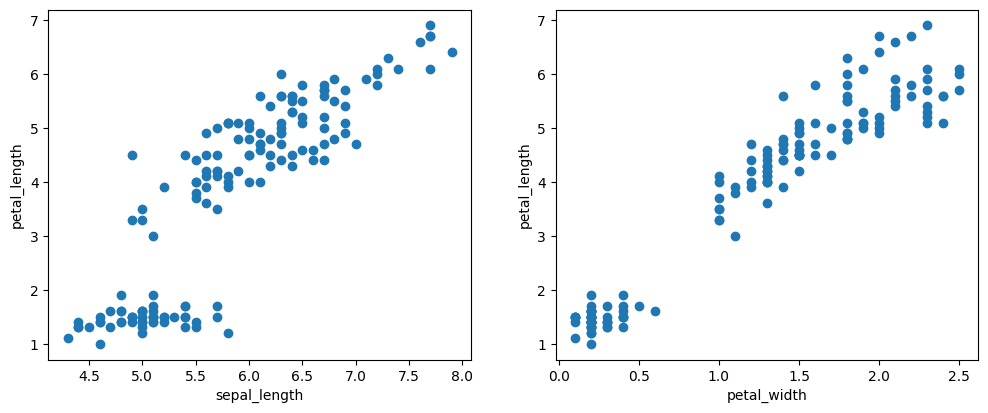

In [ ]:
df.corr()
fig = plt.figure(figsize=(12,10))

ax1=plt.subplot(221)
ax1.scatter(df.SL,df.PL)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

ax2=plt.subplot(222)
ax2.scatter(df.PW,df.PL)
plt.xlabel('petal_width')
plt.ylabel('petal_length')

In [ ]:
### TRAIN,TEST SPLIT

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [ ]:
X_train


array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [ ]:
X_test


array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [ ]:
y_train

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris

In [ ]:
### MODELING

In [ ]:
# Fitting Decision Tree Model to the Training set
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=4)
DT.fit(X_train,y_train)
DT.score(X_train, y_train)
DT.score(X_test, y_test)

1.0

In [ ]:
# Predicting the Test set results

In [ ]:
y_test_pred = DT.predict(X_test)

In [ ]:
X_test,y_test

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3],
        [6. , 2.9, 4.5, 1.5],
        [6.8, 2.8, 4.8, 1.4],
        [5.4, 3.4, 1.5, 0.4],
        [5.6, 2.9, 3.6, 1.3],
        [6.9, 3.1, 5.1, 2.3],
        [6.2, 2.2, 4.5, 1.5],
        [5.8, 2.7, 3.9, 1.2],
        [6.5, 3.2, 5.1, 2. ],
        [4.8, 3. , 1.4, 0.1],
        [5.5, 3.5, 1.3, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.1, 3.8, 1.5, 0.3],
        [6.3, 3.3, 4.7, 1.6],
        [6.5, 3. , 5.8, 2.2],
        [5.6, 2.5, 3.9, 1.1],
        [5.7, 2.8, 4.5, 1.3],
        [6.4, 2.8, 5.6, 2.2],
        [4.7, 3.2, 1.6, 0.2],
        [6.1, 3. , 4.9, 1.8],
        [5. , 3.4, 1.6, 0.4],
        [6.4, 2.8, 5.6, 2.1],
        [7.9, 3.8, 6.4, 2. ],
        [6.7, 3. , 5.2, 2.3],
        [6.7, 2.5, 5.8, 1.8],
        [6.8, 3.2, 5.9, 2.3],
        [4.8, 3. , 1.4, 0.3],
        [4.8, 3.1, 1.6, 0.2]]),
 array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versi

In [ ]:
### SAVE THE MODEL AS A PRECOMPILED PKL FILE

In [ ]:
import pickle
pickle.dump(DT, open('model.pkl', 'wb'))

In [ ]:
### LOAD THE MODEL TO COMPARE THE RESULTS

In [ ]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[6.1,2.8,4.7,1.2]]))

['Iris-versicolor']
